In [33]:
from scipy.ndimage import sobel
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

In [34]:
x = torch.from_numpy(np.linspace(-1, 1, 128))
signal =  x**3
signal.shape

torch.Size([128])

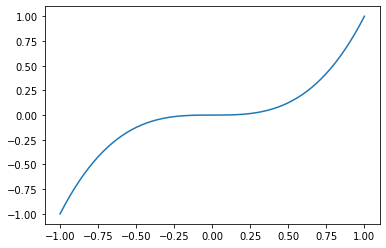

In [35]:
plt.plot(x, signal)

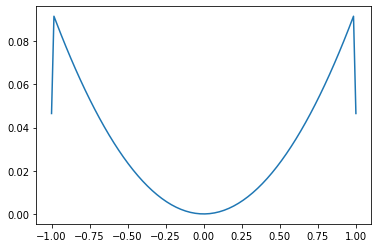

In [36]:
d1 = sobel(signal)
plt.plot(x, d1)

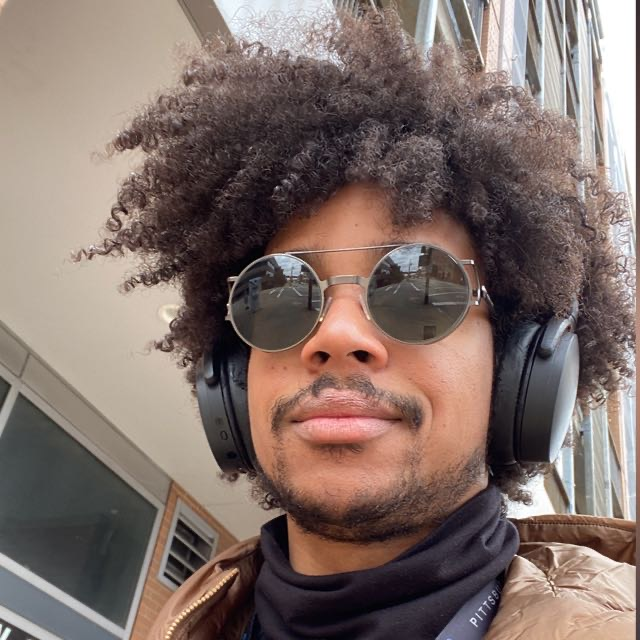

In [37]:
img = Image.open('E:\Workspace\impa\mrnet\img\hallpaz.jpg')
img

In [38]:
signal2 = torch.from_numpy(np.array(img)).permute((2, 0, 1)) / 255
signal2.shape

torch.Size([3, 640, 640])

In [39]:
d1x = sobel(signal2, axis=1)
d1x.shape

(3, 640, 640)

In [40]:
np.min(d1x), np.max(d1x)

(-12.780393, 13.192157)

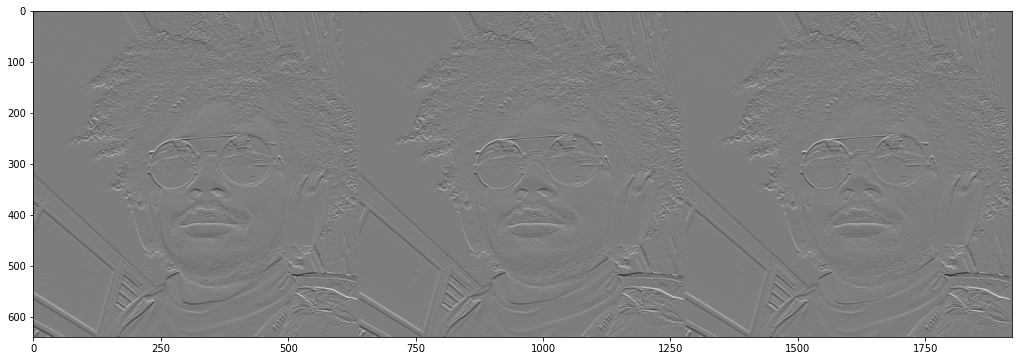

In [41]:
plt.figure(figsize=(18, 6))
plt.imshow(np.hstack([d1x[i, ...] for i in range(len(d1x))]), cmap='gray')

In [42]:
d1y = sobel(signal2, axis=2)
d1y.shape, np.min(d1y), np.max(d1y)

((3, 640, 640), -13.960785, 12.439216)

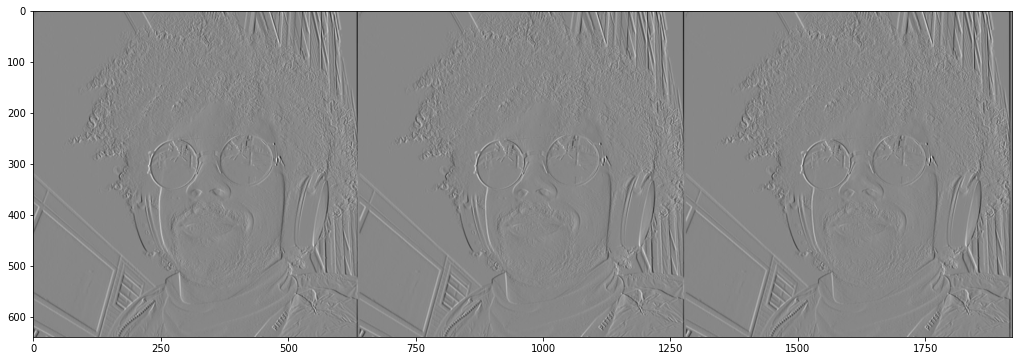

In [43]:
plt.figure(figsize=(18, 6))
plt.imshow(np.hstack([d1y[i, ...] for i in range(len(d1y))]), cmap='gray')

In [44]:
mag = np.sqrt(d1x**2 + d1y**2)
mag.shape, np.min(mag), np.max(mag)

((3, 640, 640), 0.0, 13.974182)

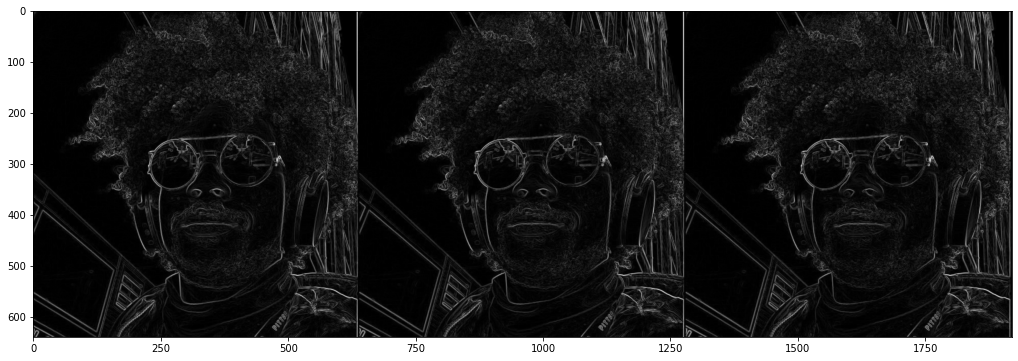

In [45]:
plt.figure(figsize=(18, 6))
plt.imshow(np.hstack([mag[i, ...] for i in range(len(mag))]), cmap='gray')

In [46]:
derivatives = torch.stack(
    [torch.from_numpy(d1x), torch.from_numpy(d1y)], dim=-1)
derivatives.shape

torch.Size([3, 640, 640, 2])